In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [10]:
abspath = 'C:/Users/hy11/PycharmProjects/CAPM/'
data = pd.read_excel(abspath + 'capm.xls', index_col=0)

data.head()

,SANDP,FORD,GE,MICROSOFT,ORACLE,USTB3M
Date,,,,,,
2002-01-01,1130.199951,15.30,37.150002,31.855000,17.260000,1.68
2002-02-01,1106.729980,14.88,38.500000,29.170000,16.620001,1.76
2002-03-01,1147.390015,16.49,37.400002,30.155001,12.800000,1.83
2002-04-01,1076.920044,16.00,31.549999,26.129999,10.040000,1.75
2002-05-01,1067.140015,17.65,31.139999,25.455000,7.920000,1.76


In [11]:
def LogDiff(x):
    x_diff = 100 *np.log( x /x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff
    
data = pd.DataFrame({'ret_sandp' : LogDiff(data['SANDP']),
                    'ret_ford' : LogDiff(data['FORD']),
                    'USTB3M' : data['USTB3M' ] /12,
                    'ersandp' : LogDiff(data['SANDP']) - data['USTB3M' ] /12,
                    'erford' : LogDiff(data['FORD']) - data['USTB3M' ] /12})
data.head()


,ret_sandp,ret_ford,USTB3M,ersandp,erford
Date,,,,,
2002-01-01,NaN,NaN,0.140000,NaN,NaN
2002-02-01,-2.098486,-2.783480,0.146667,-2.245153,-2.930147
2002-03-01,3.608011,10.273611,0.152500,3.455511,10.121111
2002-04-01,-6.338466,-3.016541,0.145833,-6.484299,-3.162375
2002-05-01,-0.912297,9.814706,0.146667,-1.058964,9.668039


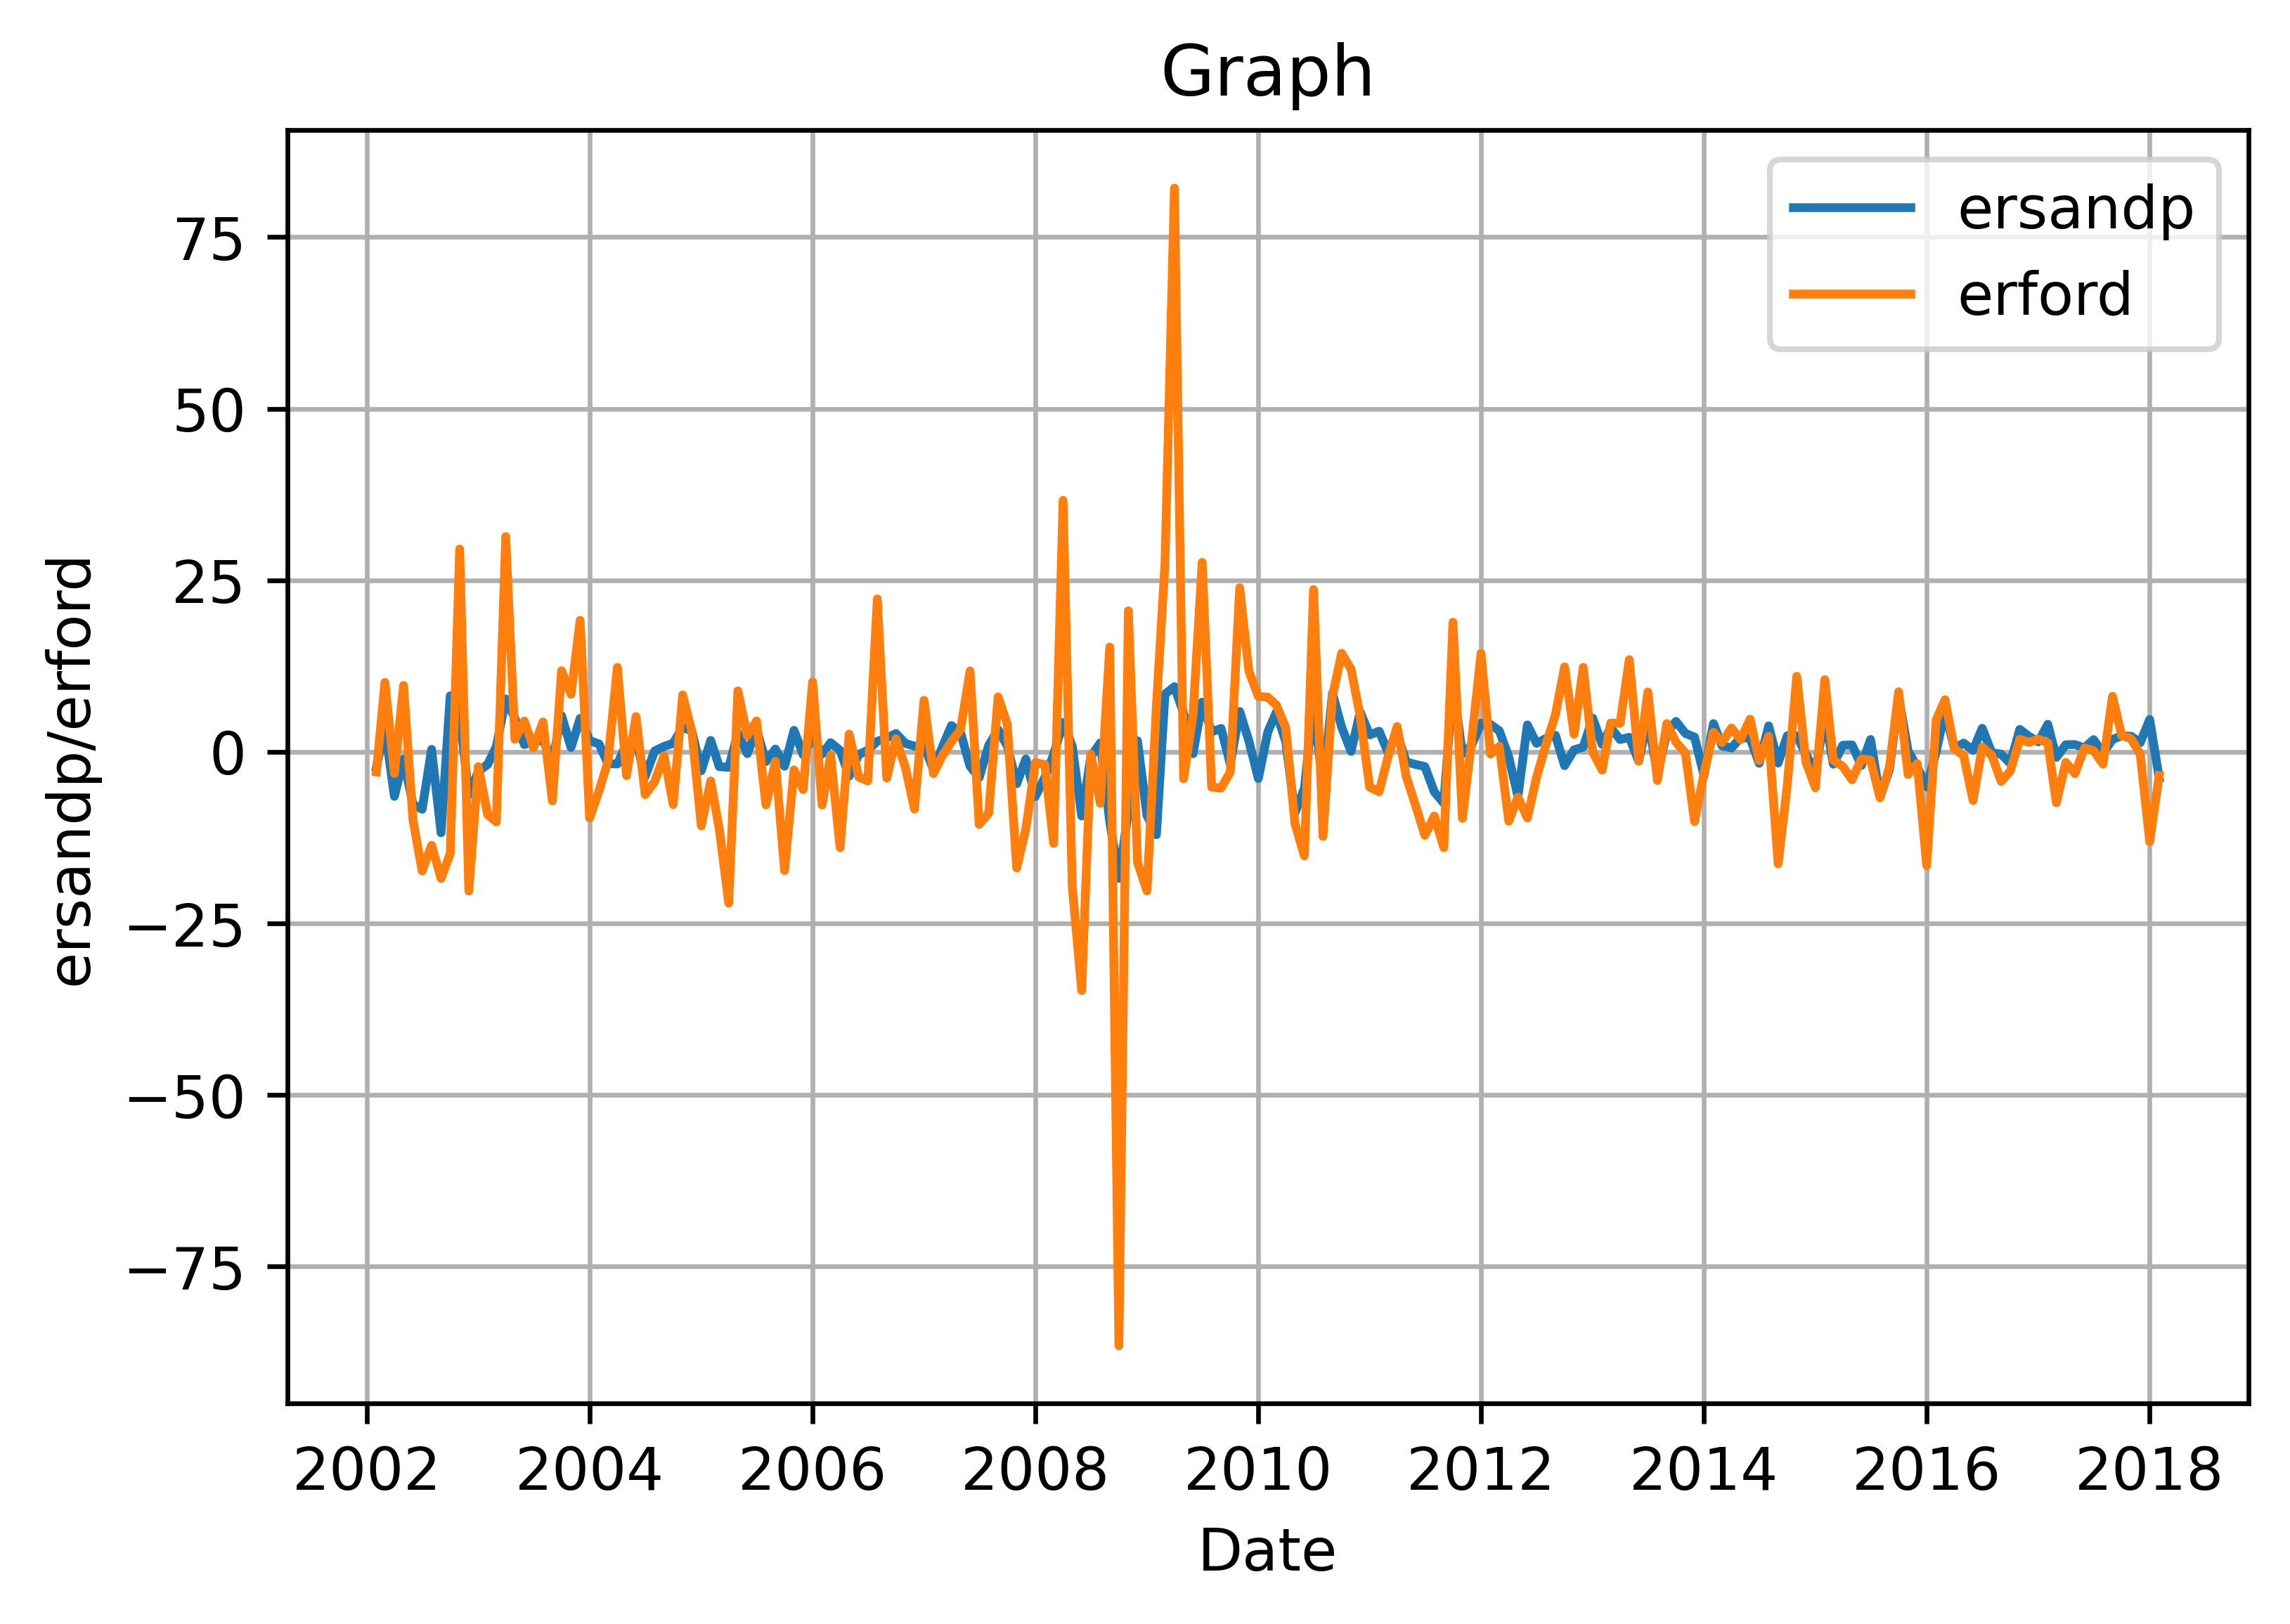

In [12]:
plt.figure(1, dpi=600)
plt.plot(data['ersandp'], label='ersandp')
plt.plot(data['erford'], label='erford')

plt.xlabel('Date')
plt.ylabel('ersandp/erford')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()

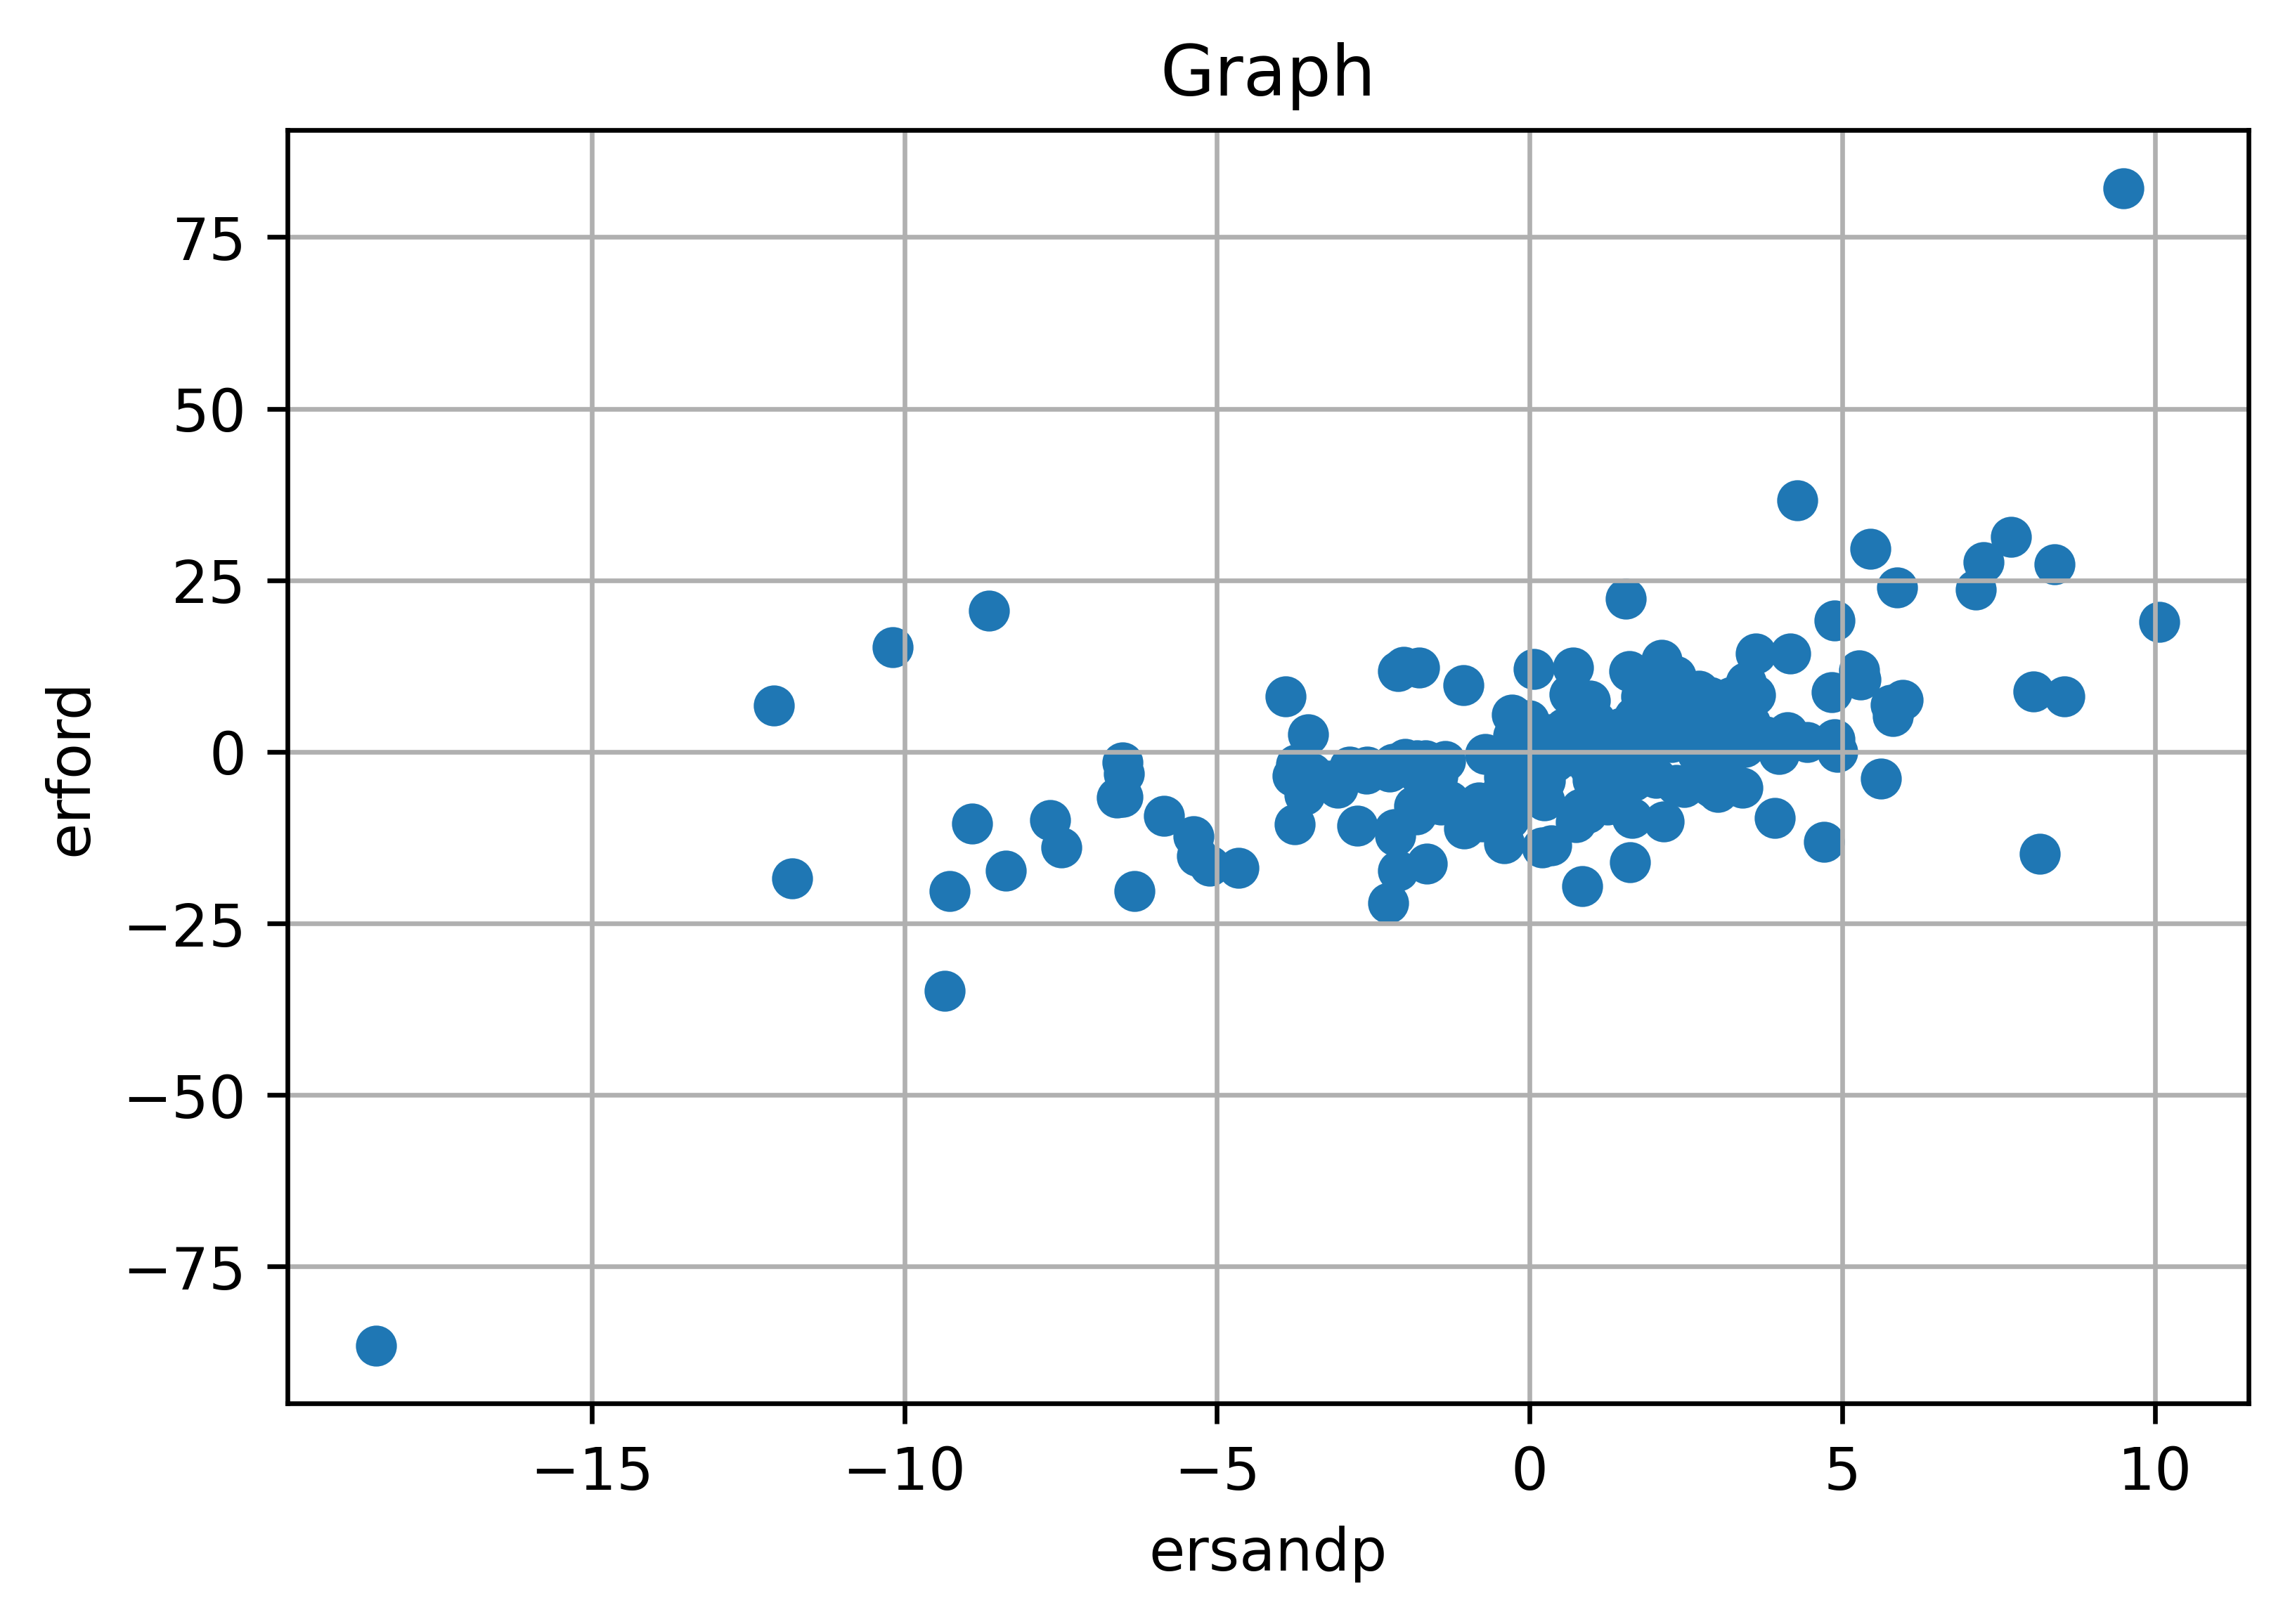

In [13]:
plt.figure(2, dpi=600)

plt.scatter(data['ersandp'], data['erford'])

plt.xlabel('ersandp')
plt.ylabel('erford')
plt.title('Graph')
plt.grid(True)

plt.show()


In [14]:
formula = 'erford ~ ersandp'
results = smf.ols(formula, data).fit()
print(results.summary())

# F-test: hypothesis testing
formula = 'erford ~ ersandp'
hypotheses = 'ersandp = 1'

results = smf.ols(formula, data).fit()
f_test = results.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     97.26
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           8.36e-19
Time:                        00:01:12   Log-Likelihood:                -735.26
No. Observations:                 193   AIC:                             1475.
Df Residuals:                     191   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9560      0.793     -1.205      0.2